In [33]:
import datetime, time

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output, display, HTML

In [34]:
train = pd.read_csv(r"D:\GoogleChromeDownload\train_deleted.csv")
test = pd.read_csv(r"D:\GoogleChromeDownload\test_deleted.csv")
all_data = pd.concat([train, test], ignore_index=True, sort=False)

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
print(train.shape)
print(test.shape)

(1708337, 29)
(401589, 29)


In [36]:
test.columns.tolist()

['channelGrouping',
 'date',
 'fullVisitorId',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.deviceCategory',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'totals.bounces',
 'totals.hits',
 'totals.newVisits',
 'totals.pageviews',
 'totals.sessionQualityDim',
 'totals.timeOnSite',
 'totals.transactionRevenue',
 'trafficSource.campaign',
 'trafficSource.isTrueDirect',
 'trafficSource.medium',
 'trafficSource.referralPath',
 'trafficSource.source',
 'customDimensions.value']

In [38]:
all_data['fullVisitorId'] = all_data['fullVisitorId'].astype(str)
# all_data['device_isMobile'] = all_data['device_isMobile'].astype(str)

all_data['totals.hits'] = all_data['totals.hits'].astype('float64')
all_data['totals.pageviews'] = all_data['totals.pageviews'].astype('float64')
all_data['totals.sessionQualityDim'] = all_data['totals.sessionQualityDim'].astype('float64')

all_data['totals.transactionRevenue'] = all_data['totals.transactionRevenue'].astype('float64')
# all_data['totals_totalTransactionRevenue'] = all_data['totals_totalTransactionRevenue'].astype('float64')

train['fullVisitorId'] = train['fullVisitorId'].astype(str)
# train['device_isMobile'] = train['device_isMobile'].astype(str)

train['totals.hits'] = train['totals.hits'].astype('float64')
train['totals.pageviews'] = train['totals.pageviews'].astype('float64')
train['totals.sessionQualityDim'] = train['totals.sessionQualityDim'].astype('float64')

all_data['totals.transactionRevenue'] = all_data['totals.transactionRevenue'].astype('float64')
# all_data['totals_totalTransactionRevenue'] = all_data['totals_totalTransactionRevenue'].astype('float64')


test['fullVisitorId'] = test['fullVisitorId'].astype(str)
# test['device_isMobile'] = test['device_isMobile'].astype(str)

test['totals.hits'] = test['totals.hits'].astype('float64')
test['totals.pageviews'] = test['totals.pageviews'].astype('float64')
test['totals.sessionQualityDim'] = test['totals.sessionQualityDim'].astype('float64')

test['totals.transactionRevenue'] = test['totals.transactionRevenue'].astype('float64')
# test['totals_totalTransactionRevenue'] = test['totals_totalTransactionRevenue'].astype('float64')

# Date to day conversion
all_data['date'] =  pd.to_datetime(all_data['date'], format = '%Y%m%d').astype(np.int64)/10**9/86400
train['date'] =  pd.to_datetime(train['date'], format = '%Y%m%d').astype(np.int64)/10**9/86400
test['date'] =  pd.to_datetime(test['date'], format = '%Y%m%d').astype(np.int64)/10**9/86400

In [39]:
# Replace different NaN Values
nan_values = ["not available in demo dataset", "unknown.unknown", "nan", "(none)", "(not set)", "/", "", "None", None]
all_data = all_data.replace(nan_values, np.nan)
train = train.replace(nan_values, np.nan)
test = test.replace(nan_values, np.nan)

In [40]:
columns_to_drop = [] # List of columns to drop during the preprocessing.

all_data['totals.transactionRevenue'] = all_data['totals.transactionRevenue'].fillna(0)
# all_data['totals_totalTransactionRevenue'] = all_data['totals_totalTransactionRevenue'].fillna(0)

train['totals.transactionRevenue'] = train['totals.transactionRevenue'].fillna(0)
# train['totals_totalTransactionRevenue'] = train['totals_totalTransactionRevenue'].fillna(0)

test['totals.transactionRevenue'] = test['totals.transactionRevenue'].fillna(0)
# test['totals_totalTransactionRevenue'] = test['totals_totalTransactionRevenue'].fillna(0)

print("Empty values in 'totals_transactionRevenue' and 'totals_totalTransactionRevenue' columns filled with 0.")

columns_to_drop.extend(list(all_data.columns[all_data.isnull().mean() > 0.5]))
columns_to_drop.extend(list(all_data.columns[all_data.nunique() == 1]))

all_data.drop(columns = columns_to_drop, inplace=True)
train.drop(columns = columns_to_drop, inplace=True)
test.drop(columns = columns_to_drop, inplace=True)
print('Dropped all columns with more than 50% missing data and 1 unique value.')

Empty values in 'totals_transactionRevenue' and 'totals_totalTransactionRevenue' columns filled with 0.
Dropped all columns with more than 50% missing data and 1 unique value.


In [41]:
# if the column is numeric replace empty values with the median
numeric_cols = all_data.select_dtypes(include=['int64','float64']).columns
for col in all_data.loc[:, numeric_cols]:
    all_data[col] = all_data[col].fillna(all_data[col].median())

# if the column is categorical replace empty values with the mode
categorical_cols = all_data.select_dtypes(include=['object']).columns
for col in all_data.loc[:, categorical_cols]:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [42]:
# if the column is numeric replace empty values with the median
numeric_cols = train.select_dtypes(include=['int64','float64']).columns
for col in train.loc[:, numeric_cols]:
    train[col] = train[col].fillna(train[col].median())

# if the column is categorical replace empty values with the mode
categorical_cols = train.select_dtypes(include=['object']).columns
for col in train.loc[:, categorical_cols]:
    train[col] = train[col].fillna(train[col].mode()[0])

In [43]:
# if the column is numeric replace empty values with the median
numeric_cols = test.select_dtypes(include=['int64','float64']).columns
for col in test.loc[:, numeric_cols]:
    test[col] = test[col].fillna(test[col].median())

# if the column is categorical replace empty values with the mode
categorical_cols = test.select_dtypes(include=['object']).columns
for col in test.loc[:, categorical_cols]:
    test[col] = test[col].fillna(test[col].mode()[0])

In [44]:
# Encode Categorical Columns
le = LabelEncoder()

for col in categorical_cols:
    le.fit(all_data[col])
    
    all_data[col] = le.transform(all_data[col])
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Data columns (total 25 columns):
channelGrouping               int32
date                          float64
fullVisitorId                 int32
visitId                       int64
visitNumber                   int64
visitStartTime                int64
device.browser                int32
device.deviceCategory         int32
device.operatingSystem        int32
geoNetwork.continent          int32
geoNetwork.country            int32
geoNetwork.networkDomain      int32
geoNetwork.subContinent       int32
totals.bounces                float64
totals.hits                   float64
totals.newVisits              float64
totals.pageviews              float64
totals.sessionQualityDim      float64
totals.timeOnSite             float64
totals.transactionRevenue     float64
trafficSource.isTrueDirect    bool
trafficSource.medium          int32
trafficSource.referralPath    int32
trafficSource.source          int32
customDi

In [46]:
train.to_csv(r"D:\Kaggle\train.csv", index=False)
test.to_csv(r"D:\Kaggle\test.csv", index=False)
all_data.to_csv(r"D:\Kaggle\all_data.csv", index=False)

In [47]:
test_X = test.loc[:, test.columns != 'totals.transactionRevenue']
test_y = test['totals.transactionRevenue']
train_X = train.loc[:, train.columns != 'totals.transactionRevenue']
train_y = train['totals.transactionRevenue']
all_data_X = all_data.loc[:, all_data.columns != 'totals.transactionRevenue']
all_data_y = all_data['totals.transactionRevenue']

In [48]:
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

for key, values in parameters.items():
    print(key,"\t- ", values)

fit_intercept 	-  [True, False]
normalize 	-  [True, False]


In [49]:
start = time.time()

gridSearchResult = GridSearchCV(LinearRegression(),
                                parameters, 
                                cv = 5, 
                                scoring='neg_mean_squared_error', 
                                verbose=5
                               ).fit(all_data_X, all_data_y)

clear_output()

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

Time Taken: 00:01:43.011


In [50]:
# Show all results
results_df = pd.DataFrame.from_dict(gridSearchResult.cv_results_)
results_df.T

,0,1,2,3
mean_fit_time,4.66712,4.2975,4.03865,4.06025
std_fit_time,0.399676,0.184825,0.12994,0.258932
mean_score_time,0.606741,0.603386,0.630314,0.616986
std_score_time,0.0485246,0.0439009,0.0563436,0.046061
param_fit_intercept,True,True,False,False
param_normalize,True,False,True,False
params,"{'fit_intercept': True, 'normalize': True}","{'fit_intercept': True, 'normalize': False}","{'fit_intercept': False, 'normalize': True}","{'fit_intercept': False, 'normalize': False}"
split0_test_score,-9.07769e+14,-9.07769e+14,-9.07824e+14,-9.07824e+14
split1_test_score,-3.63772e+15,-3.63772e+15,-3.63784e+15,-3.63784e+15
split2_test_score,-1.6512e+15,-1.6512e+15,-1.65132e+15,-1.65132e+15


In [51]:
# Results with rank 1
rank_one = results_df[results_df['rank_test_score'] == 1][['params', 'mean_fit_time', 'std_fit_time', 'mean_test_score', 'std_test_score']]
rank_one = pd.concat([rank_one['params'].apply(pd.Series), rank_one], axis = 1, sort=True).drop(columns = 'params')
rank_one.T

,1
fit_intercept,True
normalize,False
mean_fit_time,4.2975
std_fit_time,0.184825
mean_test_score,-2.27015e+15
std_test_score,1.11013e+15


In [52]:
gridSearchResult.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
start = time.time()

LR = gridSearchResult.best_estimator_.fit(train_X, train_y)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
time_taken = "{:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds)

In [62]:
predictions = pd.Series(LR.predict(test_X))

In [63]:
print("Mean Squared Error:", mean_squared_error(test_y, predictions)**0.5)

Mean Squared Error: 58699950.25111303


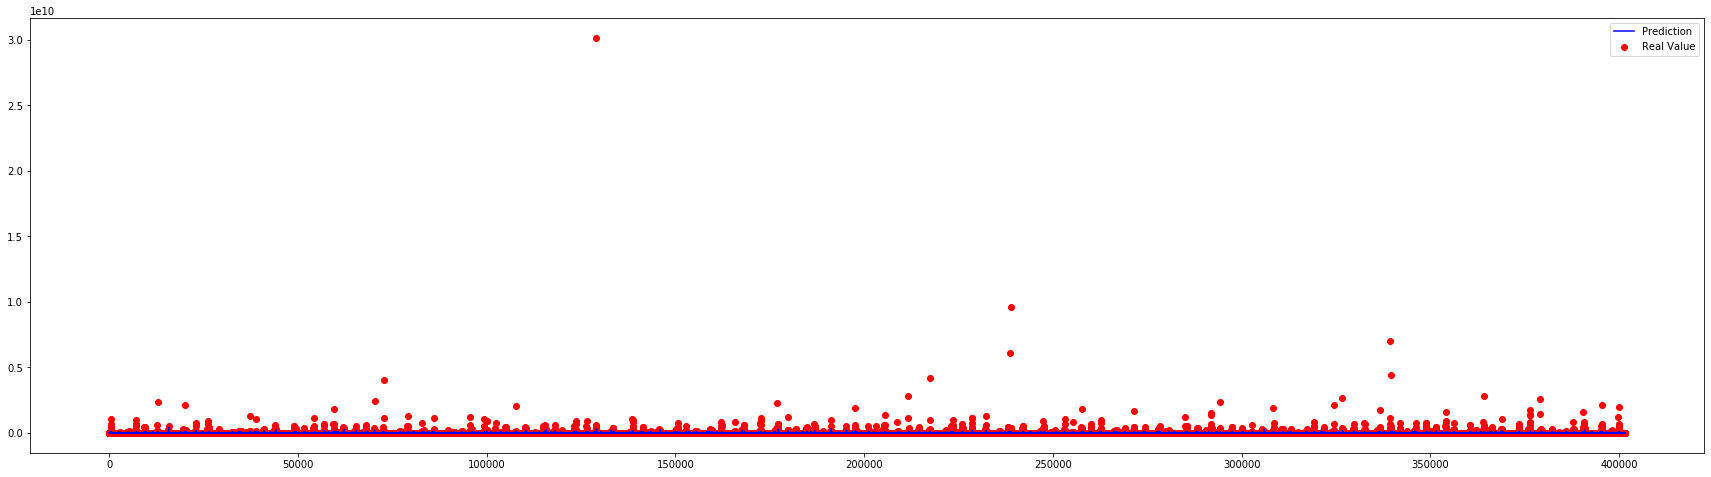

In [56]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()

In [126]:
pre_list = list(LR.predict(test_X))

In [113]:
import math

In [127]:
for i in range(len(pre_list)):
    if pre_list[i] > 0:
        pre_list[i] = math.log(pre_list[i], 10)
    else:
        pre_list[i] = 0

In [128]:
test_list = list(test_y)
print(max(test_list))
for i in range(len(test_list)):
    if test_list[i] > 0:
        test_list[i] = math.log(test_list[i], 10)
    else:
        test_list[i] = 0
print(max(test_list))

30169940000.0
10.479574446479434


In [129]:
print("Mean Squared Error:", mean_squared_error(test_list, pre_list)**0.5)

Mean Squared Error: 3.38053302455548


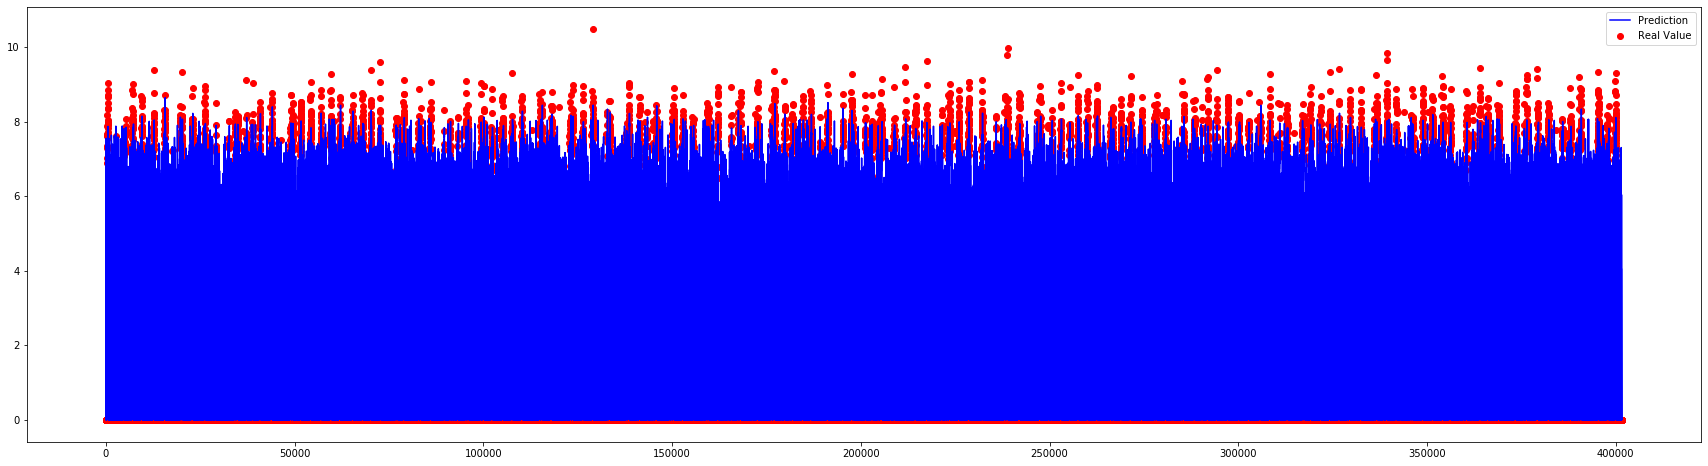

In [130]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(range(len(pre_list)), pre_list, color = 'blue', label='Prediction')
ax.scatter(range(len(test_list)), test_list, color = 'red', label='Real Value')
ax.legend(loc='best')
plt.show()

In [59]:
LR2 = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True).fit(train_X, train_y)

In [60]:
predictions2 = pd.Series(LR2.predict(test_X))

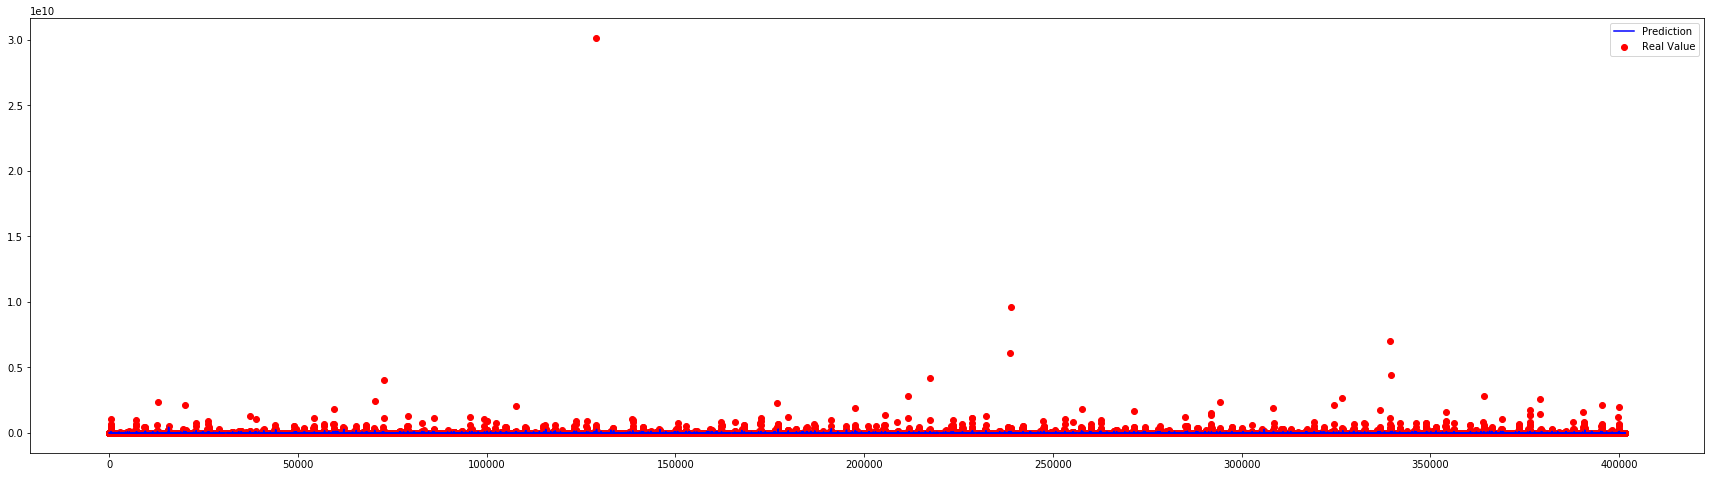

In [61]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions2.index, predictions2, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()